Import necessary packages.

In [1]:
# import all functions from python labrary: sympy
from sympy import *
# import python library: matplotlib (for nice plots)
import matplotlib
# set sympy output to print pretty math expressions
init_printing()

Declare variables we are going to use as 'symbols'. We will add more along the way, if necessary.

In [2]:
q1, q2, q3, p1, p2, p3, y = symbols('q1 q2 q3 p1 p2 p3 y')

# 5. Solve for optimal consumption analytically (CD utility, 3 goods)

## Setup the optimization program

Our optimization problem is
\begin{align}
    & \max_{q_1,q_2,q_3}\quad u(q_1,q_2,q_3) = q_1^{\alpha} q_2^{\beta} q_3^{1-\alpha-\beta} \\
    \text{s.t.}\quad & p_1 q_1 + p_2 q_2 + p_3 q_3= y
\end{align}

### Algebraic solution

The Lagrangian is
$$ \mathcal{L} = q_1^{\alpha} q_2^{\beta} q_3^{1-\alpha-\beta} + \lambda (y - p_1 q_1 - p_2 q_2 - p_3 q_3)$$

which implies the first order conditions (w.r.t. each control variable and $\lambda$):

\begin{align}
    \frac{\partial \mathcal{L}}{\partial q_1} &= \alpha q_1^{\alpha - 1} q_2^{\beta} q_3^{1-\alpha-\beta} - \lambda p_1 = 0 \\
    \frac{\partial \mathcal{L}}{\partial q_2} &= \beta q_1^{\alpha} q_2^{\beta - 1} q_3^{1-\alpha-\beta} - \lambda p_2 = 0 \\
    \frac{\partial \mathcal{L}}{\partial q_3} &= (1-\alpha-\beta) q_1^{\alpha} q_2^{\beta} q_3^{1-\alpha-\beta-1} - \lambda p_3 = 0 \\
    \frac{\partial \mathcal{L}}{\partial \lambda} &= y - p_1 q_1 - p_2 q_2 - p_3 q_3 = 0  
\end{align}

And we jointly solve for $q_1, q_2, q_3, \lambda$.

We can rewrite the FOCs as

\begin{align}
    \alpha q_1^{\alpha - 1} q_2^{\beta} q_3^{1-\alpha-\beta} &= \lambda p_1 \tag{1} \\
    \beta q_1^{\alpha} q_2^{\beta - 1} q_3^{1-\alpha-\beta} &= \lambda p_2 \tag{2} \\
    (1-\alpha-\beta) q_1^{\alpha} q_2^{\beta} q_3^{1-\alpha-\beta-1} &= \lambda p_3 \tag{3} \\
   y - p_1 q_1 - p_2 q_2 - p_3 q_3 &= 0  \tag{4} 
\end{align}

To solve the 4 equations with 4 unknowns, we want to write two of the quantities in terms of a third one.

As an example, we will try to write both $q_1$ and $q_2$ in terms of $q_3$ so we can substitute them into the budget constraint (4) and solve for a single variable function.

To do that, we divide (1) by (3) and get

\begin{align}
    && \frac{\alpha q_1^{\alpha - 1} q_2^{\beta} q_3^{1-\alpha-\beta}}{(1-\alpha-\beta) q_1^{\alpha} q_2^{\beta} q_3^{1-\alpha-\beta-1}} &= \frac{p_1}{p_3} \\
        \qquad\Rightarrow\qquad &&  \frac{\alpha q_1^{-1} }{(1-\alpha-\beta) q_3^{-1}} &= \frac{p_1}{p_3} \\
        \qquad\Rightarrow\qquad &&  \frac{\alpha q_3 }{(1-\alpha-\beta) q_1} &= \frac{p_1}{p_3} \\
        \qquad\Rightarrow\qquad &&  q_1 &= \frac{p_3}{p_1} \frac{\alpha q_3 }{(1-\alpha-\beta)} \tag{5}
\end{align}

Similarly, dividing (2) by (3), we have

\begin{align}
    &&  \frac{\beta q_1^{\alpha} q_2^{\beta - 1} q_3^{1-\alpha-\beta}}{(1-\alpha-\beta) q_1^{\alpha} q_2^{\beta} q_3^{1-\alpha-\beta-1}} &= \frac{p_2}{p_3} \\
        \qquad\Rightarrow\qquad &&  \frac{\beta q_2^{- 1}}{(1-\alpha-\beta) q_3^{-1}} &= \frac{p_2}{p_3} \\
        \qquad\Rightarrow\qquad &&  \frac{\beta q_3}{(1-\alpha-\beta) q_2} &= \frac{p_2}{p_3} \\
        \qquad\Rightarrow\qquad &&  q_2 &= \frac{p_3}{p_2} \frac{\beta q_3}{(1-\alpha-\beta) }   \tag{6}
\end{align}

Now we are ready to substitute (5) and (6) into (4) and solve for $q_3^*$. 

After that, we can substitute $q_3^*$ back into (5) and (6) to find $q_1^*$ and $q_2^*$. 

We turn to the sympy setup to solve through the entire problem. 

## Setup the utility function

In [3]:
# define alpha as a rational number of 1/2
#alpha = Rational(1,2)
alpha, beta = symbols('alpha beta')


# Note: in sympy syntax: use double star ** for power
u = q1**(alpha) * q2**(beta) * q3**(1-alpha-beta)
# show the defined function
u

## Setup the lagrangian

In [4]:
lam = symbols('lambda')
lagr = u + lam *(y - p1*q1 - p2*q2 - p3*q3)
lagr

Solve the first-order conditions. 

Note the syntax of the solve function, especially the use of the brackets:
solve( (eq1, eq2, eq3), var1, var2, var3)

The equations are by default treated as equal to 0 by the solver.

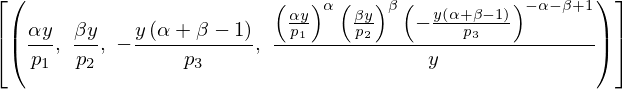

In [5]:
foc_sol = solve( ( diff(lagr,q1), diff(lagr,q2), diff(lagr,q3), diff(lagr,lam) ), q1,q2,q3,lam)
foc_sol

The solution is a list with one element, because our solution is unique.

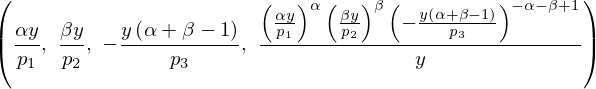

In [6]:
foc_sol[0]

To access the first element in our solution, which is a list by itself, we use the list index again.

In [7]:
q1star = foc_sol[0][0]
q1star

In [8]:
q2star = foc_sol[0][1]
q2star

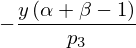

In [9]:
q3star = foc_sol[0][2]
q3star

Substitute optimal consumption into the direct utility function, to calculate the optimal utility level attainable at the given exogenous variables. 

The resulting function is our **indirect utility function**, $v(p_1,p_2,y)$.

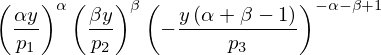

In [10]:
v = u.subs([(q1,q1star), (q2,q2star), (q3,q3star)])
v